# EDA on GDN data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
gn = pd.read_csv("data.tsv/Result_3.tsv", sep='\t')
gn

,id,when,activityType,strikeTime,batchId,createdBy,trapId,groupId,organisationId,killType,latitude,longitude,temperature,batteryLevel,hasImage,trapInstalledAt
0,1,2018-06-17 20:12:02.455+00,SYNCED,NaN,1.0,NaN,1,NaN,NaN,NaN,-41.277712,174.780174,NaN,100.0,False,2018-06-17 20:12:02.157+00
1,4,2018-06-17 20:12:02.461+00,STRIKE,2017-04-04 06:10:20+00,1.0,2.0,1,NaN,NaN,NaN,-41.277712,174.780174,NaN,NaN,False,2018-06-17 20:12:02.157+00
2,7,2018-06-17 20:12:02.461+00,STRIKE,2017-04-04 06:13:20+00,1.0,2.0,1,NaN,NaN,NaN,-41.277712,174.780174,NaN,NaN,False,2018-06-17 20:12:02.157+00
3,2,2018-06-17 20:12:02.461+00,STRIKE,2017-04-04 06:08:20+00,1.0,2.0,1,NaN,NaN,NaN,-41.277712,174.780174,NaN,NaN,False,2018-06-17 20:12:02.157+00
4,6,2018-06-17 20:12:02.461+00,STRIKE,2017-04-04 06:12:20+00,1.0,2.0,1,NaN,NaN,NaN,-41.277712,174.780174,NaN,NaN,False,2018-06-17 20:12:02.157+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1094470,1407145,2021-08-01 21:02:34.786+00,STRIKE,2021-07-28 10:30:03+00,118850.0,16255.0,30338,NaN,NaN,NaN,-36.731976,174.689250,8.0,NaN,False,2021-06-20 01:41:52.175+00
1094471,1407146,2021-08-01 21:02:34.866+00,UNCOLLECTED_DATA,NaN,NaN,16255.0,30338,NaN,NaN,NaN,-36.731976,174.689250,NaN,NaN,False,2021-06-20 01:41:52.175+00
1094472,1407148,2021-08-01 21:02:40.056+00,SYNCED,NaN,NaN,NaN,30338,NaN,NaN,NaN,-36.731976,174.689250,NaN,NaN,False,2021-06-20 01:41:52.175+00
1094473,1407147,2021-08-01 21:02:40.056+00,SYNCED,NaN,NaN,NaN,30338,NaN,NaN,NaN,-36.731976,174.689250,NaN,NaN,False,2021-06-20 01:41:52.175+00


In [3]:
len(gn.columns)
gn.columns

Index(['id', 'when', 'activityType', 'strikeTime', 'batchId', 'createdBy',
       'trapId', 'groupId', 'organisationId', 'killType', 'latitude',
       'longitude', 'temperature', 'batteryLevel', 'hasImage',
       'trapInstalledAt'],
      dtype='object')

In [4]:
categorical_cols = []
numerical_cols = []
dtypes = gn.dtypes
for col in dtypes.index:
    if dtypes[col] == 'object':
        categorical_cols.append(col)
    else:
        numerical_cols.append(col)

# Print the results
print('Categorical columns:', categorical_cols)
print('Numerical columns:', numerical_cols)

Categorical columns: ['when', 'activityType', 'strikeTime', 'killType', 'trapInstalledAt']
Numerical columns: ['id', 'batchId', 'createdBy', 'trapId', 'groupId', 'organisationId', 'latitude', 'longitude', 'temperature', 'batteryLevel', 'hasImage']


# EDA

* Potential X-axes: *
'id', 'groupId', ~~'batchId'~~, 'organisation', 'temprature'
* Potential Y-axes: *
'activityType', ~~'killType'~~ , 'latitude', 'batteryLevel'
* Date columns *
'when', 'strikeTime', 'trapInstalledAt'
* Spatial *
'latitude', 'longitude'

In [5]:
gn.describe()

,id,batchId,createdBy,trapId,groupId,organisationId,latitude,longitude,temperature,batteryLevel
count,1.094475e+06,146897.000000,200093.000000,1.094475e+06,156219.000000,166287.000000,1.069192e+06,1.069192e+06,136049.000000,6781.000000
mean,6.856965e+05,50354.808396,6896.972908,1.432919e+04,5326.688501,49.054304,-3.919526e+01,1.704840e+02,14.128917,91.822298
std,3.944782e+05,34239.120510,4851.357885,8.054630e+03,4931.055723,40.690564,5.575132e+00,1.409357e+01,8.586693,12.224769
min,1.000000e+00,1.000000,2.000000,1.000000e+00,463.000000,7.000000,-4.690310e+01,-1.718197e+02,-126.000000,0.000000
25%,3.506645e+05,19698.000000,2542.000000,7.517000e+03,1305.000000,12.000000,-4.129779e+01,1.725943e+02,9.000000,90.000000
50%,6.674240e+05,46343.000000,5871.000000,1.445700e+04,2939.000000,32.000000,-4.018884e+01,1.747228e+02,13.000000,96.000000
75%,1.025644e+06,80518.000000,10820.000000,2.015300e+04,9093.000000,86.000000,-3.708923e+01,1.750791e+02,18.000000,98.000000
max,1.407149e+06,118850.000000,18401.000000,3.214100e+04,16165.000000,137.000000,6.424405e+01,1.783482e+02,255.000000,100.000000


In [6]:
print(np.sum(gn.isna(), axis=1))
gn.isnull().sum(axis=0)

0          6
1          5
2          5
3          5
4          5
          ..
1094470    4
1094471    7
1094472    8
1094473    8
1094474    6
Length: 1094475, dtype: int64


id                       0
when                     0
activityType             0
strikeTime          954359
batchId             947578
createdBy           894382
trapId                   0
groupId             938256
organisationId      928188
killType           1048204
latitude             25283
longitude            25283
temperature         958426
batteryLevel       1087694
hasImage                 0
trapInstalledAt          0
dtype: int64

In [8]:
gn['strikeTime'] = pd.to_datetime(gn['strikeTime'])
gn['strikeTime'].max()

Timestamp('2021-08-01 20:24:05+0000', tz='UTC')

In [44]:
gn['strikeTime'].min()

Timestamp('1970-01-01 00:00:00+0000', tz='UTC')

In [43]:
# Filter the dataframe for the year 2018
gn_2017 = gn[gn['strikeTime'].dt.year == 2018]

# Find the minimum value of 'strikeTime' in 2018
min_strikeTime_2018 = gn_2017['strikeTime'].min()
print(min_strikeTime_2018)

2018-01-01 04:42:04+00:00


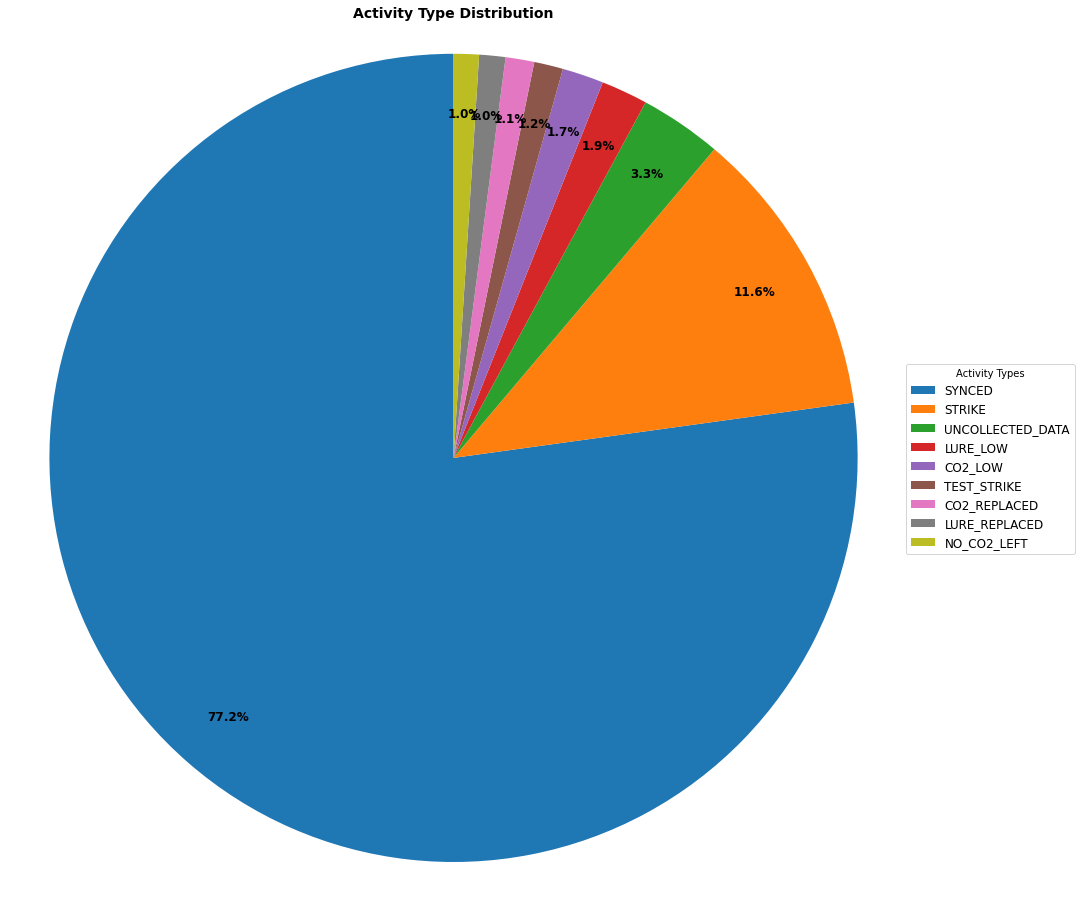

In [52]:
import matplotlib.pyplot as plt

# Calculate the percentage of each category
category_counts = gn['activityType'].value_counts()
category_percentages = (category_counts / len(gn)) * 100

# Create the pie chart with increased figsize and other styling
fig, ax = plt.subplots(figsize=(16, 16))
# colors = ['#FF9999', '#66B2FF', '#99FF99', '#FFCC99']  # Customize colors
# explode = (0.1, 0, 0, 0)  # Explode the first slice for emphasis, if desired

# Plot the pie chart with styling options
wedges, texts, autotexts = ax.pie(category_percentages, labels=None,
                                  autopct='%1.1f%%', startangle=90,
                                  pctdistance=0.85)

# Customize font sizes and styles
ax.axis('equal')  # Equal aspect ratio ensures a circular pie chart
plt.setp(autotexts, size=12, weight='bold')

# Add text labels outside the pie chart
ax.legend(wedges, category_counts.index, loc='center left', bbox_to_anchor=(1, 0.5),
          fontsize=12, title="Activity Types")

# Add a title
plt.title("Activity Type Distribution", fontsize=14, fontweight='bold')

# Display the chart
plt.show()



#### When are most traps installed?

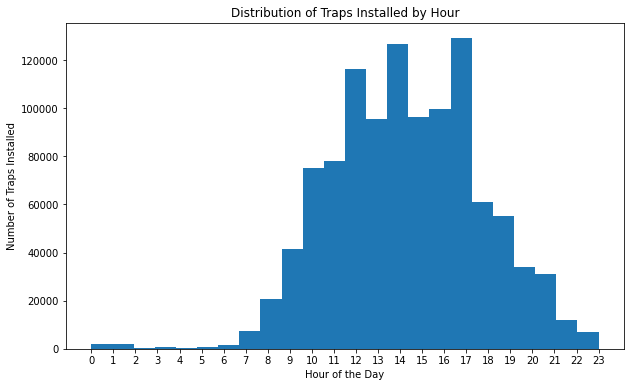

In [10]:
from pytz import timezone

gn['trapInstalledAt'] = pd.to_datetime(gn['trapInstalledAt'])
nz_timezone = timezone('Pacific/Auckland')
gn['trapInstalledAt_NZ'] = gn['trapInstalledAt'].dt.tz_convert(nz_timezone)

# Extract hour from the datetime column
gn['trapInstalledAt_hour'] = gn['trapInstalledAt_NZ'].dt.hour


# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(gn['trapInstalledAt_hour'], bins=24)
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Traps Installed')
plt.title('Distribution of Traps Installed by Hour')
plt.xticks(range(0, 24))
plt.show()

#### Total number of traps

In [16]:
no_of_traps = gn['trapId'].nunique()
no_of_traps

25965

/tmp/ipykernel_3142/3782532180.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gn_unique.sort_values('trapInstalledAt', inplace=True)
/tmp/ipykernel_3142/3782532180.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gn_unique['trapInstalledAt'] = pd.to_datetime(gn_unique['trapInstalledAt'])
/tmp/ipykernel_3142/3782532180.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/use

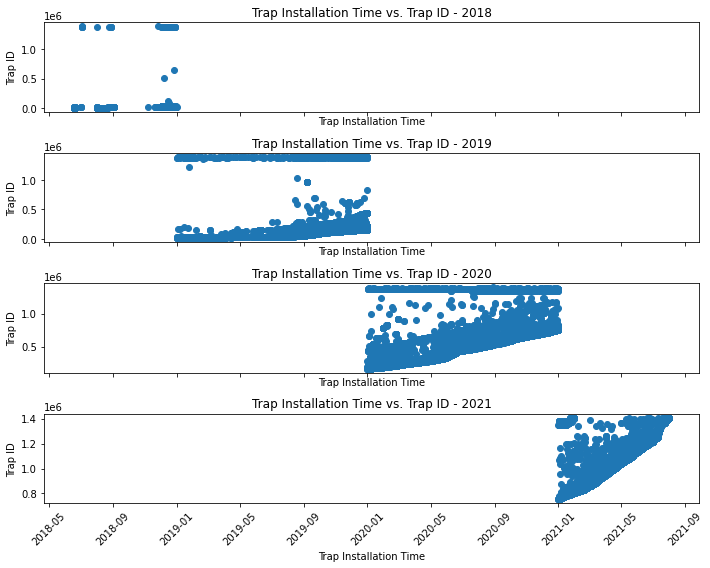

In [17]:
gn_unique = gn.drop_duplicates(subset='trapId', keep='first')

# Sort the DataFrame by 'trapInstalledAt' column
gn_unique.sort_values('trapInstalledAt', inplace=True)

gn_unique['trapInstalledAt'] = pd.to_datetime(gn_unique['trapInstalledAt'])

# Extract the year from 'trapInstalledAt' column
gn_unique['year'] = gn_unique['trapInstalledAt'].dt.year

# Get the unique years in the DataFrame
years = gn_unique['year'].unique()

# Set up the subplots
fig, axes = plt.subplots(len(years), 1, figsize=(10, 8), sharex=True)

# Iterate over each year and create a subplot
for i, year in enumerate(years):
    # Filter the DataFrame for the current year
    year_data = gn_unique[gn_unique['year'] == year]
    
    # Sort the year_data by 'trapInstalledAt'
    year_data.sort_values('trapInstalledAt', inplace=True)
    
    # Create a scatter plot on the current subplot
    axes[i].scatter(year_data['trapInstalledAt'], year_data['id'])
    axes[i].set_xlabel('Trap Installation Time')
    axes[i].set_ylabel('Trap ID')
    axes[i].set_title(f'Trap Installation Time vs. Trap ID - {year}')
    axes[i].tick_params(axis='x', rotation=45)

# Adjust the layout and spacing
plt.tight_layout()

# Display the subplots
plt.show()

In [18]:
gn["trapId"].nunique()

25965

Total number of traps = 25965

/tmp/ipykernel_3142/1969100283.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gn_unique['trapInstalledAt'] = pd.to_datetime(gn_unique['trapInstalledAt'])
/tmp/ipykernel_3142/1969100283.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gn_unique['year'] = gn_unique['trapInstalledAt'].dt.year


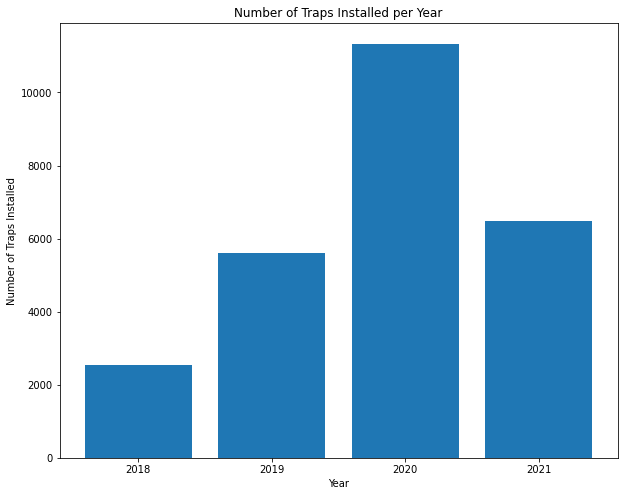

In [19]:

from matplotlib.ticker import MaxNLocator

# Convert 'trapInstalledAt' column to datetime type
gn_unique['trapInstalledAt'] = pd.to_datetime(gn_unique['trapInstalledAt'])

# Extract the year from 'trapInstalledAt' column
gn_unique['year'] = gn_unique['trapInstalledAt'].dt.year

# Group the data by year and count the number of traps in each year
traps_per_year = gn_unique.groupby('year')['id'].count()

# Plotting the histogram
fig, ax = plt.subplots(figsize=(10, 8))
ax.bar(traps_per_year.index, traps_per_year.values)
ax.set_xlabel('Year')
ax.set_ylabel('Number of Traps Installed')
ax.set_title('Number of Traps Installed per Year')

# Set the x-axis tick locator to display only integers
ax.xaxis.set_major_locator(MaxNLocator(integer=True))

plt.show()

year
2018     3608
2019    20512
2020    62827
2021    49219
Name: id, dtype: int64


/tmp/ipykernel_3142/1202079873.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gn_filtered['strikeTime'] = pd.to_datetime(gn_filtered['strikeTime'])
/tmp/ipykernel_3142/1202079873.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gn_filtered['year'] = gn_filtered['strikeTime'].dt.year


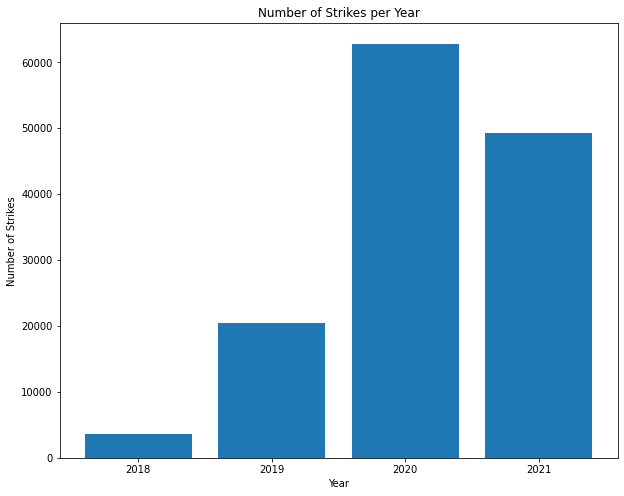

In [35]:
from matplotlib.ticker import MaxNLocator

years = [2018, 2019, 2020, 2021]
gn_filtered = gn[gn['year'].isin(years)]

# Convert 'trapInstalledAt' column to datetime type
gn_filtered['strikeTime'] = pd.to_datetime(gn_filtered['strikeTime'])

# Extract the year from 'trapInstalledAt' column
gn_filtered['year'] = gn_filtered['strikeTime'].dt.year

# Group the data by year and count the number of traps in each year
strikes_per_year = gn_filtered.groupby('year')['id'].count()

# Plotting the histogram
fig, ax = plt.subplots(figsize=(10, 8))
ax.bar(traps_per_year.astype('str').index, traps_per_year.values)
ax.set_xlabel('Year')
ax.set_ylabel('Number of Strikes')
ax.set_title('Number of Strikes per Year')

# Set the x-axis tick locator to display only integers
ax.xaxis.set_major_locator(MaxNLocator(integer=True))

print(traps_per_year)
plt.show()

In [41]:
# Convert the 'strikes_per_year' Series to a DataFrame
df_strikes_per_year = strikes_per_year.to_frame(name='strikes')

# Add a column 'year' by resetting the index
df_strikes_per_year['year'] = df_strikes_per_year.index

# Calculate the increase in number of strikes each passing year
df_strikes_per_year['num_increase'] = df_strikes_per_year['strikes'].diff()
# Calculate the percentage increase in strikes each passing year
df_strikes_per_year['rate_increase'] = ((df_strikes_per_year['strikes'] - df_strikes_per_year['strikes'].shift(1)) / df_strikes_per_year['strikes'].shift(1)) * 100
# df_strikes_per_year['rate_increase'] = df_strikes_per_year['rate_increase'].fillna(0)


# Display the resulting DataFrame
print(df_strikes_per_year)

      strikes  year  num_increase  rate_increase
year                                            
2018     3608  2018           NaN       0.000000
2019    20512  2019       16904.0     468.514412
2020    62827  2020       42315.0     206.293877
2021    49219  2021      -13608.0     -21.659478


In [28]:
# Convert 'strikeTime' column to datetime type
gn['strikeTime'] = pd.to_datetime(gn['strikeTime'])

# Filter the DataFrame for rows starting from 2018
gn1 = gn[gn['strikeTime'].dt.year >= 2018]

# Sort the filtered DataFrame by 'strikeTime' in ascending order
gn2 = gn1.sort_values('strikeTime', ascending=True)
gn2


,id,when,activityType,strikeTime,batchId,createdBy,trapId,groupId,organisationId,killType,latitude,longitude,temperature,batteryLevel,hasImage,trapInstalledAt,trapInstalledAt_NZ,trapInstalledAt_hour,year,month
567,568,2018-06-17 20:15:08.078+00,STRIKE,2018-01-01 04:42:04+00:00,152.0,2.0,152,NaN,NaN,NaN,-41.317370,174.765779,NaN,NaN,False,2018-06-17 20:15:07.919000+00:00,2018-06-18 08:15:07.919000+12:00,8,2018.0,Jan
568,569,2018-06-17 20:15:08.078+00,STRIKE,2018-01-01 04:43:04+00:00,152.0,2.0,152,NaN,NaN,NaN,-41.317370,174.765779,NaN,NaN,False,2018-06-17 20:15:07.919000+00:00,2018-06-18 08:15:07.919000+12:00,8,2018.0,Jan
569,570,2018-06-17 20:15:08.078+00,STRIKE,2018-01-01 04:44:04+00:00,152.0,2.0,152,NaN,NaN,NaN,-41.317370,174.765779,NaN,NaN,False,2018-06-17 20:15:07.919000+00:00,2018-06-18 08:15:07.919000+12:00,8,2018.0,Jan
570,571,2018-06-17 20:15:08.078+00,STRIKE,2018-01-01 04:45:04+00:00,152.0,2.0,152,NaN,NaN,NaN,-41.317370,174.765779,NaN,NaN,False,2018-06-17 20:15:07.919000+00:00,2018-06-18 08:15:07.919000+12:00,8,2018.0,Jan
571,572,2018-06-17 20:15:08.078+00,STRIKE,2018-01-01 04:46:04+00:00,152.0,2.0,152,NaN,NaN,NaN,-41.317370,174.765779,NaN,NaN,False,2018-06-17 20:15:07.919000+00:00,2018-06-18 08:15:07.919000+12:00,8,2018.0,Jan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1094375,1407043,2021-08-01 19:44:24.246+00,STRIKE,2021-08-01 12:39:24+00:00,118843.0,4906.0,10157,NaN,NaN,NaN,-41.107631,174.868247,4.0,NaN,False,2020-01-27 21:15:53.540000+00:00,2020-01-28 10:15:53.540000+13:00,10,2021.0,Aug
1094289,1406954,2021-08-01 13:35:55.272+00,STRIKE,2021-08-01 13:26:02+00:00,118838.0,18180.0,31921,NaN,NaN,NaN,-37.781746,176.312579,3.0,NaN,False,2021-07-25 05:24:42.154000+00:00,2021-07-25 17:24:42.154000+12:00,17,2021.0,Aug
1094429,1407100,2021-08-01 20:37:14.644+00,STRIKE,2021-08-01 13:41:01+00:00,118847.0,18382.0,32078,NaN,NaN,NaN,-36.253335,175.421337,7.0,NaN,False,2021-07-31 04:39:16.474000+00:00,2021-07-31 16:39:16.474000+12:00,16,2021.0,Aug
1094415,1407086,2021-08-01 20:24:41.592+00,STRIKE,2021-08-01 20:24:04+00:00,118844.0,18313.0,31985,NaN,NaN,NaN,-37.778735,175.732612,6.0,NaN,False,2021-07-28 01:26:10.896000+00:00,2021-07-28 13:26:10.896000+12:00,13,2021.0,Aug


/tmp/ipykernel_3142/2488188574.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gn_unique['trapInstalledAt'] = pd.to_datetime(gn_unique['trapInstalledAt'])
/tmp/ipykernel_3142/2488188574.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gn_unique['year'] = gn_unique['trapInstalledAt'].dt.year
/tmp/ipykernel_3142/2488188574.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the do

YEAR:  2018
YEAR:  2019
YEAR:  2020
YEAR:  2021


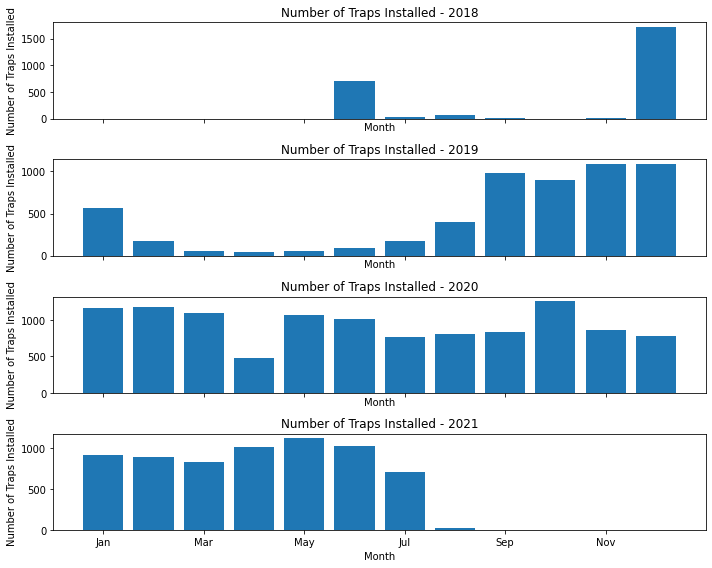

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

# Assuming 'gn' is your DataFrame with 'id' and 'trapInstalledAt' columns

# Convert 'trapInstalledAt' column to datetime type
gn_unique['trapInstalledAt'] = pd.to_datetime(gn_unique['trapInstalledAt'])

# Extract the year and month from 'trapInstalledAt' column
gn_unique['year'] = gn_unique['trapInstalledAt'].dt.year
gn_unique['month'] = gn_unique['trapInstalledAt'].dt.month_name().str.slice(stop=3)  # Get month abbreviation

# Filter data for the years 2018, 2019, 2020, 2021
years = [2018, 2019, 2020, 2021]
gn_filtered = gn_unique[gn_unique['year'].isin(years)]

# Set up the subplots
fig, axes = plt.subplots(len(years), 1, figsize=(10, 8), sharex=True)

# Iterate over each year and create a subplot
for i, year in enumerate(years):
    print("YEAR: ", year)
    # Filter the DataFrame for the current year
    year_data = gn_filtered[gn_filtered['year'] == year]
    
    # Group the data by month and count the number of traps in each month
    traps_per_month = year_data.groupby('month')['id'].count()
    
    # Sort the months in chronological order
    traps_per_month = traps_per_month.reindex(pd.date_range(start='2021-01-01', periods=12, freq='M').strftime('%b'))
    
    # Create a bar plot on the current subplot
    axes[i].bar(traps_per_month.index, traps_per_month.values)
    axes[i].set_xlabel('Month')
    axes[i].set_ylabel('Number of Traps Installed')
    axes[i].set_title(f'Number of Traps Installed - {year}')
    axes[i].xaxis.set_major_locator(MaxNLocator(integer=True))  # Display only integer month values

# Adjust the layout and spacing
plt.tight_layout()

# Display the subplots
plt.show()


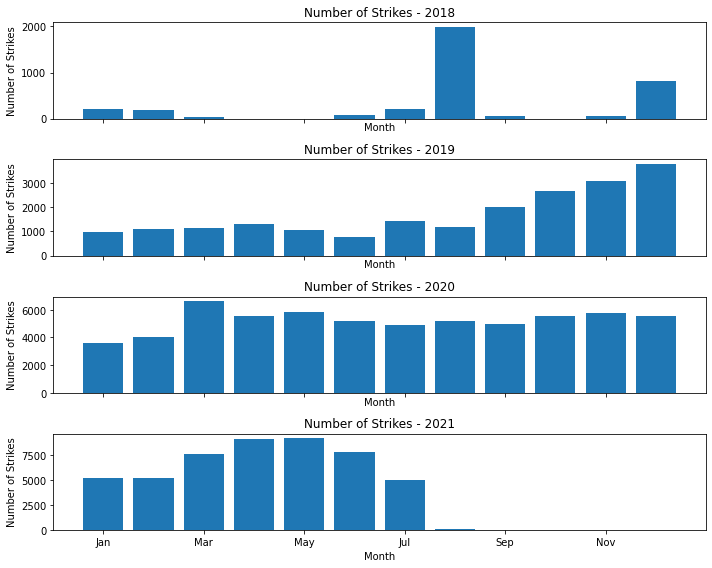

In [21]:
# Convert 'strikeTime' column to datetime type
gn['strikeTime'] = pd.to_datetime(gn['strikeTime'])

# Extract the year and month from 'strikeTime' column
gn['year'] = gn['strikeTime'].dt.year
gn['month'] = gn['strikeTime'].dt.month_name().str.slice(stop=3)  # Get month abbreviation

# Filter data for the years 2018, 2019, 2020, 2021
years = [2018, 2019, 2020, 2021]
gn_filtered = gn[gn['year'].isin(years)]

# Set up the subplots
fig, axes = plt.subplots(len(years), 1, figsize=(10, 8), sharex=True)

# Iterate over each year and create a subplot
for i, year in enumerate(years):
    # Filter the DataFrame for the current year
    year_data = gn_filtered[gn_filtered['year'] == year]
    
    # Group the data by month and count the number of strikes in each month
    strikes_per_month = year_data.groupby('month')['strikeTime'].count()
    
    # Sort the months in chronological order
    strikes_per_month = strikes_per_month.reindex(pd.date_range(start='2021-01-01', periods=12, freq='M').strftime('%b'))
    
    # Create a bar plot on the current subplot
    axes[i].bar(strikes_per_month.index, strikes_per_month.values)
    axes[i].set_xlabel('Month')
    axes[i].set_ylabel('Number of Strikes')
    axes[i].set_title(f'Number of Strikes - {year}')
    axes[i].xaxis.set_major_locator(MaxNLocator(integer=True))  # Display only integer month values

# Adjust the layout and spacing
plt.tight_layout()

# Display the subplots
plt.show()

In [216]:
gn['strikeYear'] = pd.DatetimeIndex(gn['strikeTime']).year

# Calculate the total number of strikes per year
strikes_per_year = gn.groupby('strikeYear').size()

# Print the results
print(strikes_per_year)

strikeYear
1970.0      296
1971.0        1
2017.0     3653
2018.0     3608
2019.0    20512
2020.0    62827
2021.0    49219
dtype: int64


#### When do most strikes happen?

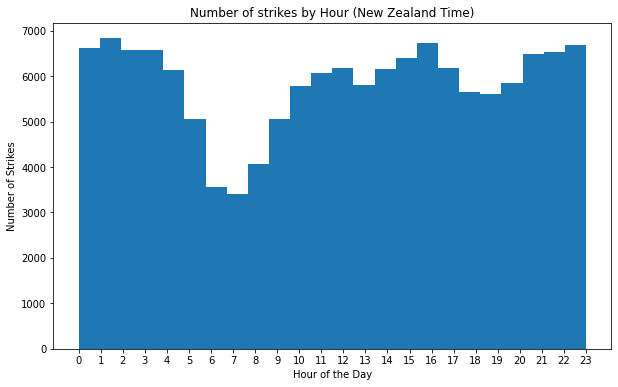

In [55]:
gn['strikeTime'] = pd.to_datetime(gn['strikeTime'])
nz_timezone = timezone('Pacific/Auckland')
gn['strikeTime_NZ'] = gn['strikeTime'].dt.tz_convert(nz_timezone)

# Extract hour from the datetime column
gn['strikeTime_hour'] = gn['strikeTime_NZ'].dt.hour


# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(gn['strikeTime_hour'], bins=24)
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Strikes')
plt.title('Number of strikes by Hour (New Zealand Time)')
plt.xticks(range(0, 24))
plt.show()

Insert article reference where breeding season of rodents are higher

#### Summer months

/tmp/ipykernel_3142/1654434193.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  summer_data['strikeTime_hour'] = summer_data['strikeTime_NZ'].dt.hour


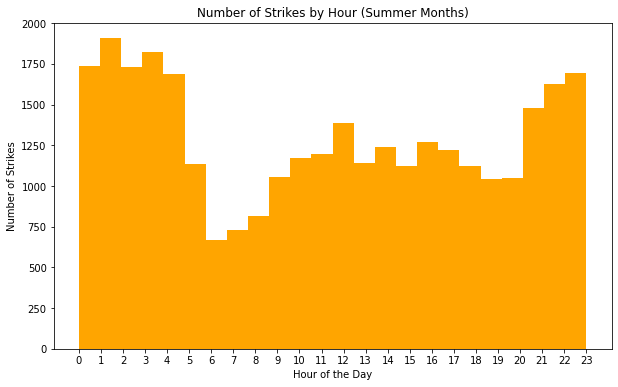

In [56]:
try:
    gn.drop('strikeTime_hour')
except:
    pass
#Filter data for the summer months (December, January, February)
summer_months = ['December', 'January', 'February']
summer_data = gn[gn['strikeTime_NZ'].dt.month_name().isin(summer_months)]

# Extract hour from the datetime column
summer_data['strikeTime_hour'] = summer_data['strikeTime_NZ'].dt.hour

# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(summer_data['strikeTime_hour'], bins=24, color='orange')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Strikes')
plt.title('Number of Strikes by Hour (Summer Months)')
plt.xticks(range(24))
plt.show()

/tmp/ipykernel_3142/1684068713.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spring_data['strikeTime_hour'] = spring_data['strikeTime_NZ'].dt.hour


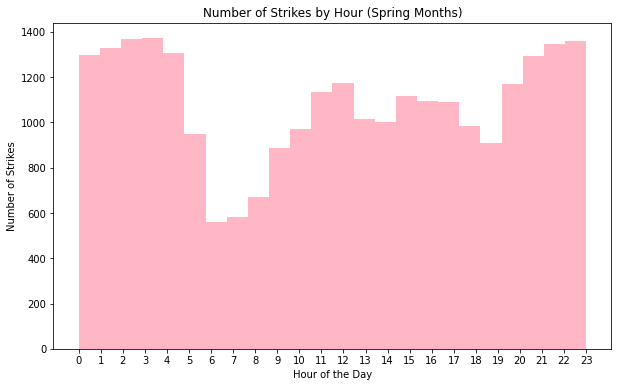

In [58]:
try:
    gn.drop('strikeTime_hour')
except:
    pass
#Filter data for the summer months (December, January, February)
spring_months = ['September', 'October', 'November']
spring_data = gn[gn['strikeTime_NZ'].dt.month_name().isin(spring_months)]

# Extract hour from the datetime column
spring_data['strikeTime_hour'] = spring_data['strikeTime_NZ'].dt.hour

# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(spring_data['strikeTime_hour'], bins=24, color='#FFB7C5')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Strikes')
plt.title('Number of Strikes by Hour (Spring Months)')
plt.xticks(range(24))
plt.show()

In [105]:
summer_data.shape

(31057, 22)

C:\Users\anjan\AppData\Local\Temp/ipykernel_20080/242069970.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  winter_data['strikeTime_hour'] = winter_data['strikeTime_NZ'].dt.hour


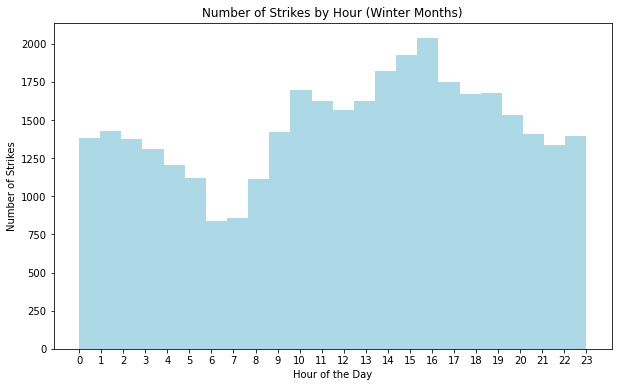

In [214]:
try:
    gn.drop('strikeTime_hour')
except:
    pass
#Filter data for the winter months (December, January, February)
winter_months = ['June', 'July', 'August']
winter_data = gn[gn['strikeTime_NZ'].dt.month_name().isin(winter_months)]

# Extract hour from the datetime column
winter_data['strikeTime_hour'] = winter_data['strikeTime_NZ'].dt.hour

# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(winter_data['strikeTime_hour'], bins=24, color = '#ADD8E6')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Strikes')
plt.title('Number of Strikes by Hour (Winter Months)')
plt.xticks(range(24))
plt.show()

In [59]:
944887/1094475

0.8633244249526029

In [106]:
winter_data.shape

(35118, 22)

In [20]:
import shapely.geos

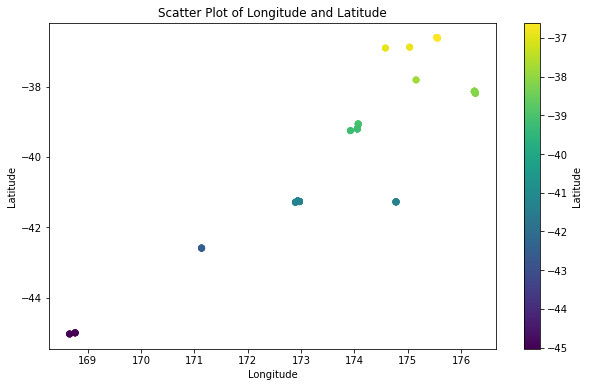

In [21]:
sample = gn.iloc[:100]

# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(sample['longitude'], sample['latitude'], c=sample['latitude'], cmap='viridis')
plt.colorbar(label='Latitude')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Scatter Plot of Longitude and Latitude')
plt.show()

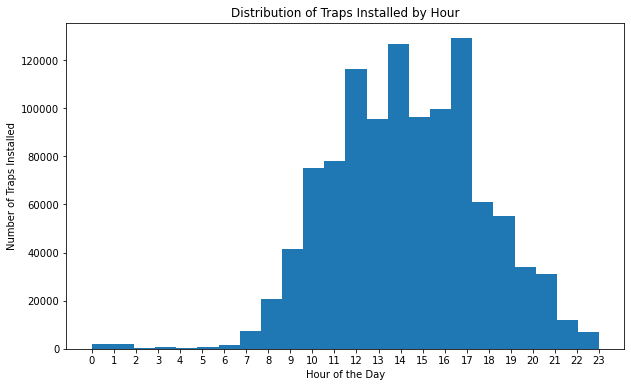

In [22]:
from pytz import timezone

gn['trapInstalledAt'] = pd.to_datetime(gn['trapInstalledAt'])
nz_timezone = timezone('Pacific/Auckland')
gn['trapInstalledAt_NZ'] = gn['trapInstalledAt'].dt.tz_convert(nz_timezone)

# Extract hour from the datetime column
gn['trapInstalledAt_hour'] = gn['trapInstalledAt_NZ'].dt.hour


# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(gn['trapInstalledAt_hour'], bins=24)
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Traps Installed')
plt.title('Distribution of Traps Installed by Hour')
plt.xticks(range(0, 24))
plt.show()

In [23]:
gn['temperature'].nunique()

103

In [24]:
print(gn_unique['trapInstalledAt'].dt.year.unique())
print(min(gn_unique["trapInstalledAt"]))
print(max(gn_unique["trapInstalledAt"]))

[2018 2019 2020 2021]
2018-06-17 20:12:02.157000+00:00
2021-08-01 06:03:52.748000+00:00


In [25]:
gn_unique['trapInstalledAt'].dt.year

0          2018
1          2018
2          2018
3          2018
4          2018
           ... 
1093818    2021
1093819    2021
1093820    2021
1093811    2021
1093806    2021
Name: trapInstalledAt, Length: 1094475, dtype: int64

In [26]:
gn_unique["id"]

0                1
1                4
2                7
3                2
4                6
            ...   
1093818    1406471
1093819    1406472
1093820    1406473
1093811    1406464
1093806    1406459
Name: id, Length: 1094475, dtype: int64

In [27]:
gn.shape

(1094475, 22)

SYNCED              844806
STRIKE              127423
UNCOLLECTED_DATA     35969
LURE_LOW             20391
CO2_LOW              18123
TEST_STRIKE          12693
CO2_REPLACED         12555
LURE_REPLACED        11453
NO_CO2_LEFT          11062
Name: activityType, dtype: int64


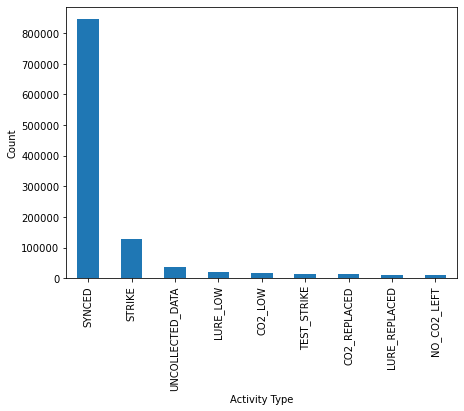

In [28]:
# Count the number of values in each category
counts = gn['activityType'].value_counts()
print(counts)
# Plot the results
counts.plot(kind='bar', figsize=(7,5))
plt.xlabel('Activity Type')
plt.ylabel('Count')
plt.show()

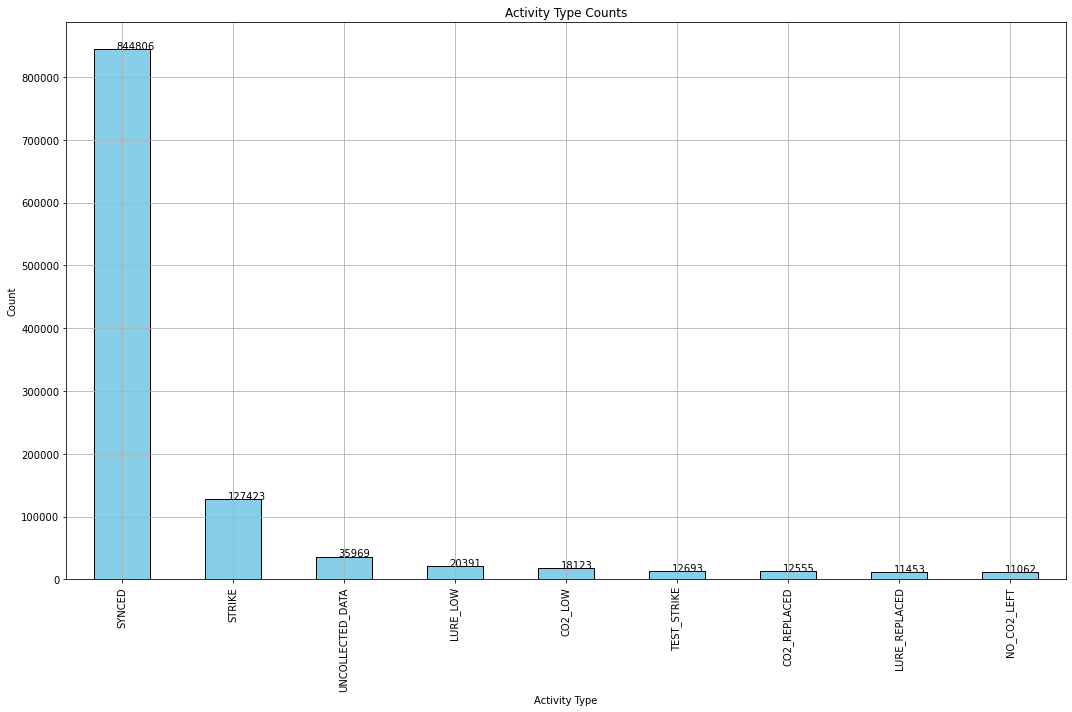

In [137]:
# Count the number of values in each category
counts = gn['activityType'].value_counts()

# Plot the results
plt.figure(figsize=(15, 10))  # Adjust the figure size as desired
ax = counts.plot(kind='bar', grid=True, color='skyblue', edgecolor='black')

plt.xlabel('Activity Type')
plt.ylabel('Count')
plt.title('Activity Type Counts')

# Add labels to the bars
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + 0.2, p.get_height() + 100))

plt.tight_layout()  # Improve spacing between elements
plt.show()

In [61]:
strikes_by_trap = gn[gn['activityType'] == 'STRIKE'].groupby('trapId').size().reset_index(name='strikeCount')
strikes_by_trap = strikes_by_trap.sort_values(by='strikeCount', ascending=False)

print(strikes_by_trap.head(60))

       trapId  strikeCount
14223   27902          584
3619     7209          565
427       430          322
7338    14129          279
10270   19684          248
6053    11644          234
912      2120          205
6985    13376          203
1574     3918          203
747      1087          197
3530     7044          191
746      1086          186
763      1138          185
744      1083          183
5310    10110          181
1375     3505          171
6429    12270          164
6751    12894          146
956      2207          146
1421     3582          144
1021     2291          143
1371     3501          141
12018   23110          138
12926   24942          138
7002    13417          136
7457    14345          135
11394   21756          134
1422     3583          132
6385    12200          130
10981   20932          122
8641    16519          121
743      1082          118
13113   25384          117
742      1081          113
1690     4100          113
1382     3512          112
1

In [63]:
 strikes_by_trap[strikes_by_trap['strikeCount'] >= threshold]

,trapId,strikeCount
14223,27902,584
3619,7209,565
427,430,322
7338,14129,279
10270,19684,248
6053,11644,234
912,2120,205
6985,13376,203
1574,3918,203
747,1087,197


In [131]:
total_strikes = gn[gn['activityType'] == 'STRIKE']['activityType'].value_counts().sum()
total_strikes

127423

In [134]:
filtered_strikes['strikePercent'] = (filtered_strikes['strikeCount'] / total_strikes) * 100
filtered_strikes

C:\Users\anjan\AppData\Local\Temp/ipykernel_20080/1517685776.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_strikes['strikePercent'] = (filtered_strikes['strikeCount'] / total_strikes) * 100


,trapId,strikeCount,strikePercent
14223,27902,584,0.458316
3619,7209,565,0.443405
427,430,322,0.252702
7338,14129,279,0.218956
10270,19684,248,0.194627
6053,11644,234,0.183640
912,2120,205,0.160881
6985,13376,203,0.159312
1574,3918,203,0.159312
747,1087,197,0.154603


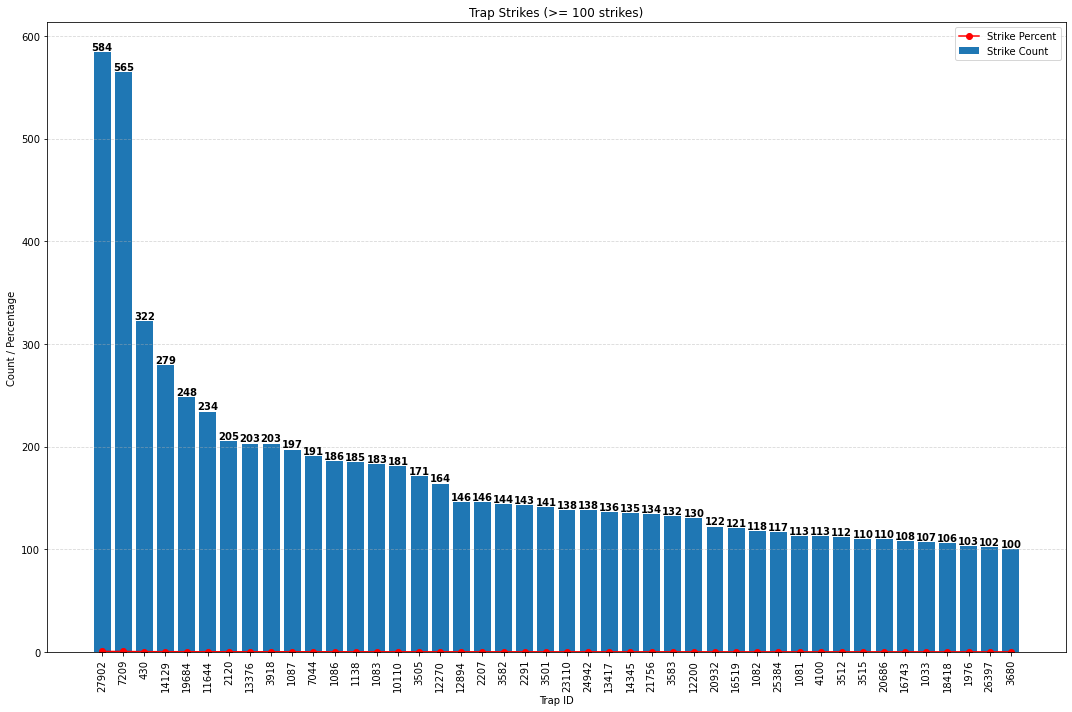

In [141]:

# Plot the data
plt.figure(figsize=(15, 10))
plt.bar(filtered_strikes['trapId'], filtered_strikes['strikeCount'], label='Strike Count')
plt.plot(filtered_strikes['trapId'], filtered_strikes['strikePercent'], color='red', marker='o', label='Strike Percent')
plt.xlabel('Trap ID')
plt.ylabel('Count / Percentage')
plt.title('Trap Strikes (>= {} strikes)'.format(threshold))
plt.xticks(rotation=90)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Add value labels on top of each bar
for i, count in enumerate(filtered_strikes['strikeCount']):
    plt.text(i, count, str(count), ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

C:\Users\anjan\AppData\Local\Temp/ipykernel_20080/3623711039.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_strikes['trapId'] = filtered_strikes['trapId'].astype(str)


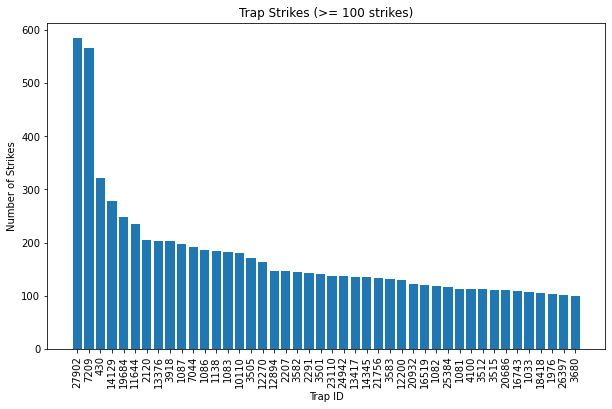

In [100]:
import matplotlib.pyplot as plt

threshold = 100
filtered_strikes = strikes_by_trap[strikes_by_trap['strikeCount'] >= threshold]

# Convert trapId to string
filtered_strikes['trapId'] = filtered_strikes['trapId'].astype(str)

plt.figure(figsize=(10, 6))
plt.bar(filtered_strikes['trapId'], filtered_strikes['strikeCount'])
plt.xlabel('Trap ID')
plt.ylabel('Number of Strikes')
plt.title('Trap Strikes (>= {} strikes)'.format(threshold))
plt.xticks(rotation=90)
plt.show()

C:\Users\anjan\AppData\Local\Temp/ipykernel_20080/1136023860.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_strikes['trapId'] = filtered_strikes['trapId'].astype(str)


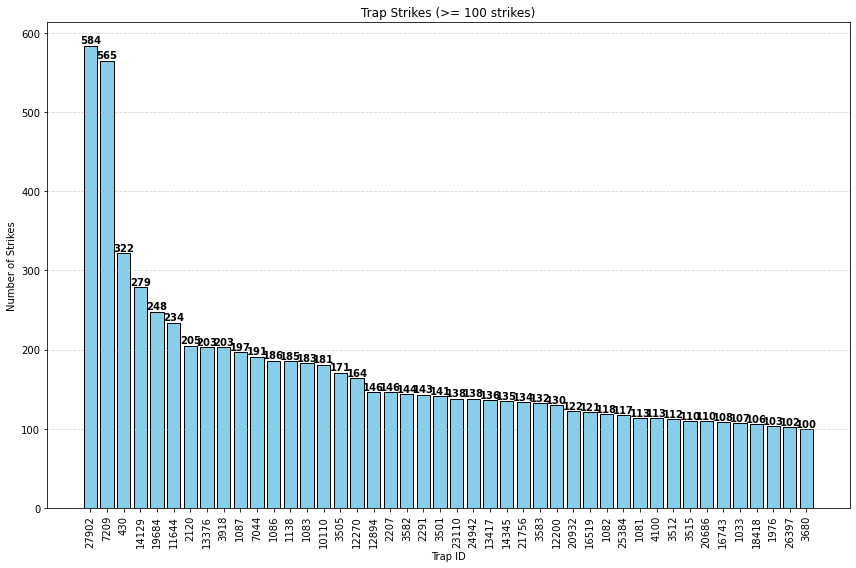

In [138]:
threshold = 100
filtered_strikes = strikes_by_trap[strikes_by_trap['strikeCount'] >= threshold]

# Convert trapId to string
filtered_strikes['trapId'] = filtered_strikes['trapId'].astype(str)

plt.figure(figsize=(12, 8))  # Adjust the figure size as desired
plt.bar(filtered_strikes['trapId'], filtered_strikes['strikeCount'], color='skyblue', edgecolor='black')
plt.xlabel('Trap ID')
plt.ylabel('Number of Strikes')
plt.title('Trap Strikes (>= {} strikes)'.format(threshold))
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.5)  # Show gridlines on the y-axis

# Add value labels on top of each bar
for i, count in enumerate(filtered_strikes['strikeCount']):
    plt.text(i, count, str(count), ha='center', va='bottom', fontweight='bold')

plt.tight_layout()  # Improve spacing between elements
plt.show()

In [132]:
filtered_strikes

,trapId,strikeCount
14223,27902,584
3619,7209,565
427,430,322
7338,14129,279
10270,19684,248
6053,11644,234
912,2120,205
6985,13376,203
1574,3918,203
747,1087,197


In [102]:
filtered_strikes['trapId'] = filtered_strikes['trapId'].astype(int)

best_strike_rate = pd.merge(filtered_strikes, gn_unique.drop_duplicates('trapId'), on='trapId', how='left')
best_strike_rate.dropna(subset=['longitude', 'latitude'], inplace=True)

best_strike_rate

C:\Users\anjan\AppData\Local\Temp/ipykernel_20080/67627334.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_strikes['trapId'] = filtered_strikes['trapId'].astype(int)


,trapId,strikeCount,id,when,activityType,strikeTime,batchId,createdBy,groupId,organisationId,...,latitude,longitude,temperature,batteryLevel,hasImage,trapInstalledAt,trapInstalledAt_NZ,trapInstalledAt_hour,year,month
0,27902,584,1214627,2021-06-29 20:57:44.597+00,SYNCED,NaN,NaN,NaN,15570.0,116.0,...,-41.319759,174.825124,NaN,NaN,False,2021-05-11 02:55:18.562000+00:00,2021-05-11 14:55:18.562000+12:00,14,2021,May
1,7209,565,623675,2020-10-15 03:38:19.439+00,STRIKE,2020-08-27 19:25:15+00,46577.0,9934.0,NaN,NaN,...,-39.008645,174.220662,1.0,NaN,False,2019-11-16 06:24:37+00:00,2019-11-16 19:24:37+13:00,19,2019,Nov
2,430,322,2534,2018-06-17 20:39:22.377+00,STRIKE,2017-09-11 23:02:02+00,430.0,2.0,NaN,NaN,...,-42.910526,171.078477,NaN,NaN,False,2018-06-17 20:39:22.153000+00:00,2018-06-18 08:39:22.153000+12:00,8,2018,Jun
3,14129,279,315757,2020-05-22 21:01:19.296+00,STRIKE,2020-05-18 17:31:01+00,28627.0,5871.0,NaN,NaN,...,-37.353331,175.247408,2.0,NaN,False,2020-05-18 05:07:14+00:00,2020-05-18 17:07:14+12:00,17,2020,May
4,19684,248,1336811,2021-07-15 22:00:17.39+00,STRIKE,2021-03-05 22:51:11+00,115661.0,10483.0,NaN,NaN,...,-41.147065,175.474093,18.0,NaN,False,2020-10-20 22:50:15+00:00,2020-10-21 11:50:15+13:00,11,2020,Oct
5,11644,234,1092220,2021-05-19 08:53:09.933+00,STRIKE,2020-07-06 09:20:45+00,89146.0,1086.0,7145.0,83.0,...,-45.606099,167.360765,8.0,NaN,False,2020-02-28 00:04:24+00:00,2020-02-28 13:04:24+13:00,13,2020,Feb
6,2120,205,35003,2019-06-11 04:00:00.529+00,LURE_LOW,NaN,NaN,NaN,588.0,11.0,...,-39.117837,174.154263,NaN,NaN,False,2018-12-11 01:31:49.479000+00:00,2018-12-11 14:31:49.479000+13:00,14,2018,Dec
7,13376,203,557434,2020-09-15 06:19:05.292+00,STRIKE,2020-05-17 04:09:44+00,42189.0,6529.0,NaN,NaN,...,-45.344982,168.718423,9.0,NaN,False,2020-04-22 04:59:00+00:00,2020-04-22 16:59:00+12:00,16,2020,Apr
8,3918,203,81957,2019-09-21 02:22:07.497+00,STRIKE,2019-07-15 18:07:43+00,9695.0,1911.0,NaN,NaN,...,-36.808441,175.489697,10.0,NaN,False,2019-05-25 02:18:52.631000+00:00,2019-05-25 14:18:52.631000+12:00,14,2019,May
9,1087,197,8950,2018-08-23 02:25:06.101+00,STRIKE,2018-08-21 06:41:38+00,1969.0,1004.0,NaN,NaN,...,-36.845467,174.767322,24.0,NaN,False,2018-08-23 02:24:30.455000+00:00,2018-08-23 14:24:30.455000+12:00,14,2018,Aug


In [98]:
best_strike_rate.shape

(151, 21)

In [107]:
filtered_strikes['trapId'] = filtered_strikes['trapId'].astype(int)

all_best_strikes = pd.merge(filtered_strikes, gn_unique, on='trapId', how='left')
all_best_strikes.dropna(subset=['longitude', 'latitude'], inplace=True)

all_best_strikes

C:\Users\anjan\AppData\Local\Temp/ipykernel_20080/292138666.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_strikes['trapId'] = filtered_strikes['trapId'].astype(int)


,trapId,strikeCount,id,when,activityType,strikeTime,batchId,createdBy,groupId,organisationId,...,latitude,longitude,temperature,batteryLevel,hasImage,trapInstalledAt,trapInstalledAt_NZ,trapInstalledAt_hour,year,month
0,27902,584,1214627,2021-06-29 20:57:44.597+00,SYNCED,NaN,NaN,NaN,15570.0,116.0,...,-41.319759,174.825124,NaN,NaN,False,2021-05-11 02:55:18.562000+00:00,2021-05-11 14:55:18.562000+12:00,14,2021,May
1,27902,584,1315755,2021-07-14 02:10:33.219+00,SYNCED,NaN,NaN,NaN,15915.0,136.0,...,-41.313285,174.779694,NaN,NaN,False,2021-05-11 02:55:18.562000+00:00,2021-05-11 14:55:18.562000+12:00,14,2021,May
2,27902,584,1067428,2021-05-11 03:35:58.29+00,STRIKE,2021-05-11 03:35:46+00,87273.0,13439.0,15570.0,116.0,...,-41.319759,174.825124,18.0,NaN,False,2021-05-11 02:55:18.562000+00:00,2021-05-11 14:55:18.562000+12:00,14,2021,May
3,27902,584,1214638,2021-06-29 20:59:05.532+00,UNCOLLECTED_DATA,NaN,NaN,13439.0,15570.0,116.0,...,-41.313285,174.779694,NaN,NaN,False,2021-05-11 02:55:18.562000+00:00,2021-05-11 14:55:18.562000+12:00,14,2021,May
4,27902,584,1315532,2021-07-14 01:51:47.724+00,SYNCED,NaN,NaN,NaN,15915.0,136.0,...,-41.313285,174.779694,NaN,NaN,False,2021-05-11 02:55:18.562000+00:00,2021-05-11 14:55:18.562000+12:00,14,2021,May
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27524,3680,100,438691,2020-07-01 06:54:05.815+00,SYNCED,NaN,NaN,NaN,NaN,NaN,...,-36.864799,174.753009,NaN,NaN,False,2019-02-17 03:39:08.372000+00:00,2019-02-17 16:39:08.372000+13:00,16,2019,Feb
27525,3680,100,438692,2020-07-01 06:54:19.454+00,STRIKE,2020-05-31 04:20:41+00,33433.0,1279.0,NaN,NaN,...,-36.864799,174.753009,13.0,NaN,False,2019-02-17 03:39:08.372000+00:00,2019-02-17 16:39:08.372000+13:00,16,2019,Feb
27526,3680,100,457782,2020-07-18 07:43:52.474+00,STRIKE,2020-06-26 10:06:05+00,35255.0,1279.0,NaN,NaN,...,-36.864799,174.753009,13.0,NaN,False,2019-02-17 03:39:08.372000+00:00,2019-02-17 16:39:08.372000+13:00,16,2019,Feb
27527,3680,100,578778,2020-09-25 10:20:02.664+00,STRIKE,2020-08-23 06:13:17+00,43772.0,1279.0,NaN,NaN,...,-36.864799,174.753009,12.0,NaN,False,2019-02-17 03:39:08.372000+00:00,2019-02-17 16:39:08.372000+13:00,16,2019,Feb


In [190]:
# all_best_strikes['strikeTime_NZ']
all_best_strikes = all_best_strikes[all_best_strikes['activityType'] == 'STRIKE']

all_best_strikes['strikeTime_month'] = all_best_strikes['strikeTime_NZ'].dt.month
all_best_strikes['strikeTime_year'] = all_best_strikes['strikeTime_NZ'].dt.year

In [192]:
all_best_strikes.columns

Index(['trapId', 'strikeCount', 'id', 'when', 'activityType', 'strikeTime',
       'batchId', 'createdBy', 'groupId', 'organisationId', 'killType',
       'latitude', 'longitude', 'temperature', 'batteryLevel', 'hasImage',
       'trapInstalledAt', 'trapInstalledAt_NZ', 'trapInstalledAt_hour', 'year',
       'month', 'strikeTime_NZ', 'strikeTime_hour', 'strikeTimeMonth',
       'strikeTime_month', 'strikeTime_year'],
      dtype='object')

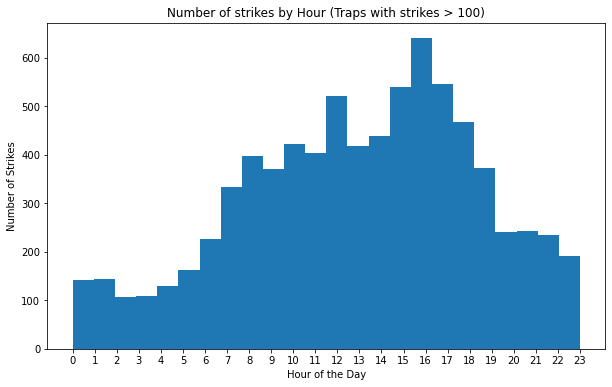

In [111]:
all_best_strikes['strikeTime'] = pd.to_datetime(all_best_strikes['strikeTime'])
# nz_timezone = timezone('Pacific/Auckland')
# all_best_strikes['strikeTime_NZ'] = all_best_strikes['strikeTime'].dt.tz_convert(nz_timezone)

# Extract hour from the datetime column
# all_best_strikes['strikeTime_hour'] = all_best_strikes['strikeTime_NZ'].dt.hour


# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(all_best_strikes['strikeTime_hour'], bins=24)
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Strikes')
plt.title('Number of strikes by Hour (Traps with strikes > 100)')
plt.xticks(range(0, 24))
plt.show()

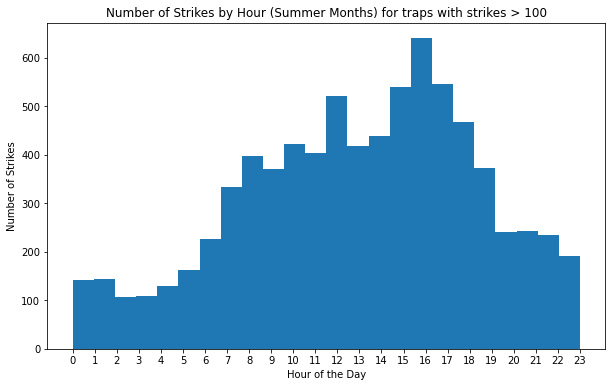

In [113]:
try:
    all_best_strikes.drop('strikeTime_hour')
except:
    pass
#Filter data for the summer months (December, January, February)
summer_months = ['December', 'January', 'February']
summer_data = all_best_strikes[all_best_strikes['strikeTime_NZ'].dt.month_name().isin(summer_months)]

# Extract hour from the datetime column
all_best_strikes['strikeTime_hour'] = all_best_strikes['strikeTime_NZ'].dt.hour

# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(all_best_strikes['strikeTime_hour'], bins=24)
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Strikes')
plt.title('Number of Strikes by Hour (Summer Months) for traps with strikes > 100')
plt.xticks(range(24))
plt.show()

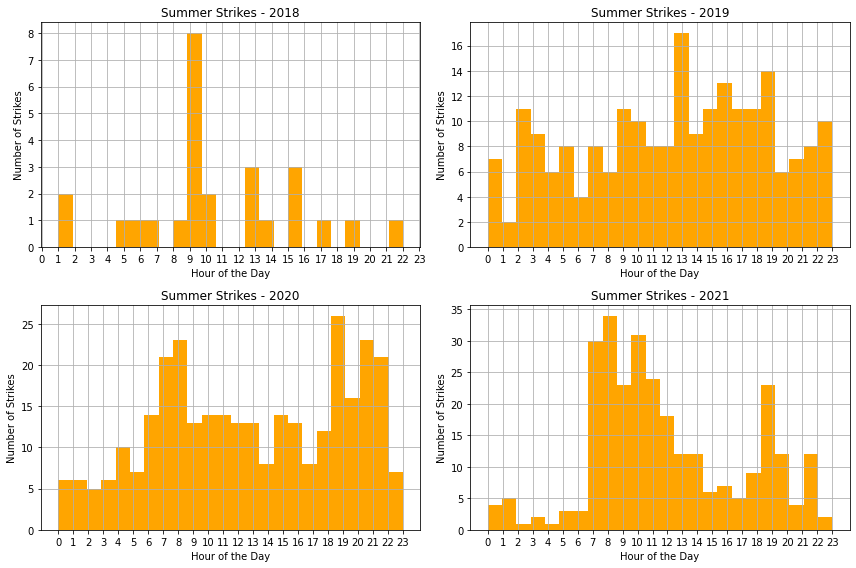

In [224]:
# Filter data for the summer months (December, January, February)
summer_months = ['December', 'January', 'February']
summer_data = all_best_strikes[all_best_strikes['strikeTime_NZ'].dt.month_name().isin(summer_months)]

# Create separate plots for each year
years = range(2018, 2022)

fig, axs = plt.subplots(2, 2, figsize=(12, 8))

for i, year in enumerate(years):
    ax = axs[i // 2, i % 2]

    # Filter data for the current year
    year_data = summer_data[summer_data['strikeTime_NZ'].dt.year == year]

    # Extract hour from the datetime column
    hour_data = year_data['strikeTime_NZ'].dt.hour

    # Plotting the histogram
    ax.hist(hour_data, bins=24, color='orange')
    ax.set_xlabel('Hour of the Day')
    ax.set_ylabel('Number of Strikes')
    ax.set_title(f'Summer Strikes - {year}')
    ax.set_xticks(range(24))
    ax.grid(True)

plt.tight_layout()
plt.show()

In [175]:
all_best_strikes.columns

Index(['trapId', 'strikeCount', 'id', 'when', 'activityType', 'strikeTime',
       'batchId', 'createdBy', 'groupId', 'organisationId', 'killType',
       'latitude', 'longitude', 'temperature', 'batteryLevel', 'hasImage',
       'trapInstalledAt', 'trapInstalledAt_NZ', 'trapInstalledAt_hour', 'year',
       'month', 'strikeTime_NZ', 'strikeTime_hour'],
      dtype='object')

C:\Users\anjan\AppData\Local\Temp/ipykernel_20080/2583865803.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  winter_data['strikeTime_hour'] = winter_data['strikeTime_NZ'].dt.hour


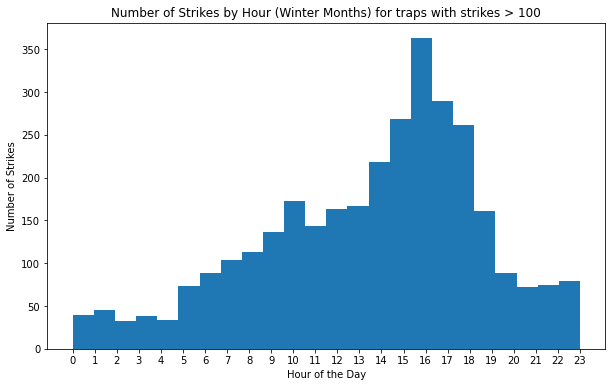

In [115]:
try:
    gn.drop('strikeTime_hour')
except:
    pass
#Filter data for the winter months (December, January, February)
winter_months = ['June', 'July', 'August']
winter_data = all_best_strikes[all_best_strikes['strikeTime_NZ'].dt.month_name().isin(winter_months)]

# Extract hour from the datetime column
winter_data['strikeTime_hour'] = winter_data['strikeTime_NZ'].dt.hour

# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(winter_data['strikeTime_hour'], bins=24)
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Strikes')
plt.title('Number of Strikes by Hour (Winter Months) for traps with strikes > 100')
plt.xticks(range(24))
plt.show()

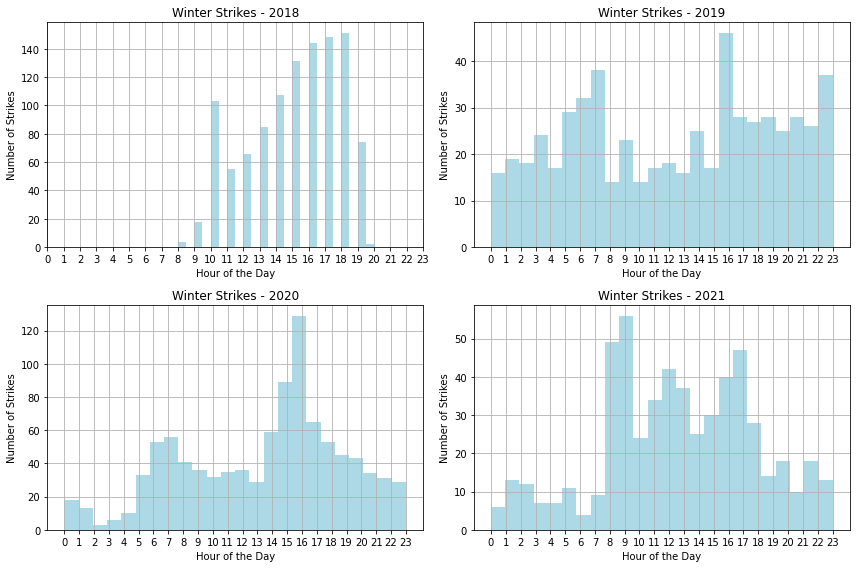

In [226]:
# Filter data for the summer months (December, January, February)
summer_months = ['June', 'July', 'August']
summer_data = all_best_strikes[all_best_strikes['strikeTime_NZ'].dt.month_name().isin(summer_months)]

# Create separate plots for each year
years = range(2018, 2022)

fig, axs = plt.subplots(2, 2, figsize=(12, 8))

for i, year in enumerate(years):
    ax = axs[i // 2, i % 2]

    # Filter data for the current year
    year_data = summer_data[summer_data['strikeTime_NZ'].dt.year == year]

    # Extract hour from the datetime column
    hour_data = year_data['strikeTime_NZ'].dt.hour

    # Plotting the histogram
    ax.hist(hour_data, bins=24, color='#ADD8E6')
    ax.set_xlabel('Hour of the Day')
    ax.set_ylabel('Number of Strikes')
    ax.set_title(f'Winter Strikes - {year}')
    ax.set_xticks(range(24))
    ax.grid(True)

plt.tight_layout()
plt.show()

In [121]:
test = best_strike_rate.head(1)

,trapId,strikeCount,id,when,activityType,strikeTime,batchId,createdBy,groupId,organisationId,...,latitude,longitude,temperature,batteryLevel,hasImage,trapInstalledAt,trapInstalledAt_NZ,trapInstalledAt_hour,year,month
0,27902,584,1214627,2021-06-29 20:57:44.597+00,SYNCED,NaN,NaN,NaN,15570.0,116.0,...,-41.319759,174.825124,NaN,NaN,False,2021-05-11 02:55:18.562000+00:00,2021-05-11 14:55:18.562000+12:00,14,2021,May


In [127]:
import folium

# Create a map centered on the mean latitude and longitude
map_center = [test['latitude'].mean(), test['longitude'].mean()]
m = folium.Map(location=map_center, zoom_start=10)

# Add markers for each data point
for index, row in best_strike_rate.iterrows():
    folium.Marker(location=['-41.319759', '174.825124']).add_to(m)
    
m

In [104]:
import folium

# Create a map centered on the mean latitude and longitude
map_center = [best_strike_rate['latitude'].mean(), best_strike_rate['longitude'].mean()]
m = folium.Map(location=map_center, zoom_start=10)

# Add markers for each data point
for index, row in best_strike_rate.iterrows():
    folium.Marker(location=[row['latitude'], row['longitude']]).add_to(m)
    
m

In [99]:
import folium

# Create a map centered on the mean latitude and longitude
map_center = [best_strike_rate['latitude'].mean(), best_strike_rate['longitude'].mean()]
m = folium.Map(location=map_center, zoom_start=10)

# Add markers for each data point
for index, row in best_strike_rate.iterrows():
    folium.Marker(location=[row['latitude'], row['longitude']]).add_to(m)

# Display the map
m

In [55]:
gn.shape

(16258, 22)

In [57]:
gn['trapId'].value_counts()

14572    65980
2295     23336
17114    19208
13719    12299
27902    12127
         ...  
22336        1
21585        1
16183        1
21066        1
18290        1
Name: trapId, Length: 25965, dtype: int64

In [58]:
activity_counts_per_trap = gn.groupby('trapId')['activityType'].count().sort_values(ascending=False)
activity_counts_per_trap = pd.DataFrame({'TrapId': activity_counts_per_trap.index, 'ActivityCount': activity_counts_per_trap.values})

activity_counts_per_trap

,TrapId,ActivityCount
0,14572,65980
1,2295,23336
2,17114,19208
3,13719,12299
4,27902,12127
...,...,...
25960,18103,1
25961,29952,1
25962,18106,1
25963,18107,1


In [59]:
test = gn[gn['trapId'] == 14572]
test

,id,when,activityType,strikeTime,batchId,createdBy,trapId,groupId,organisationId,killType,latitude,longitude,temperature,batteryLevel,hasImage,trapInstalledAt
249778,323867,2020-05-27 05:08:30.884+00,SYNCED,NaN,NaN,NaN,14572,NaN,NaN,NaN,-40.934859,175.506819,NaN,NaN,False,2020-05-27 05:07:11.202+00
249779,323868,2020-05-27 05:08:36.49+00,TEST_STRIKE,2020-05-27 05:09:01+00,29335.0,7377.0,14572,NaN,NaN,Test strike,-40.934859,175.506819,19.0,NaN,False,2020-05-27 05:07:11.202+00
249780,323869,2020-05-27 05:08:42.4+00,SYNCED,NaN,NaN,NaN,14572,NaN,NaN,NaN,-40.934859,175.506819,NaN,NaN,False,2020-05-27 05:07:11.202+00
252099,326795,2020-05-29 04:28:16.216+00,SYNCED,NaN,NaN,NaN,14572,NaN,NaN,NaN,-40.934859,175.506819,NaN,NaN,False,2020-05-27 05:07:11.202+00
252100,326798,2020-05-29 04:28:16.216+00,SYNCED,NaN,NaN,NaN,14572,NaN,NaN,NaN,-40.934859,175.506819,NaN,NaN,False,2020-05-27 05:07:11.202+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
753140,947287,2021-03-31 18:06:35.728+00,UNCOLLECTED_DATA,NaN,NaN,7377.0,14572,NaN,NaN,NaN,-40.934859,175.506819,NaN,NaN,False,2020-05-27 05:07:11.202+00
860587,1068961,2021-05-11 21:43:29.192+00,SYNCED,NaN,NaN,NaN,14572,NaN,NaN,NaN,-40.934859,175.506819,NaN,NaN,False,2020-05-27 05:07:11.202+00
860588,1068962,2021-05-11 21:43:38.941+00,STRIKE,2021-05-11 20:54:28+00,87379.0,7377.0,14572,NaN,NaN,Scavenged,-40.934859,175.506819,10.0,NaN,False,2020-05-27 05:07:11.202+00
860589,1068963,2021-05-11 21:43:39.154+00,UNCOLLECTED_DATA,NaN,NaN,7377.0,14572,NaN,NaN,NaN,-40.934859,175.506819,NaN,NaN,False,2020-05-27 05:07:11.202+00


In [31]:
gn_unique.shape

(1094475, 20)

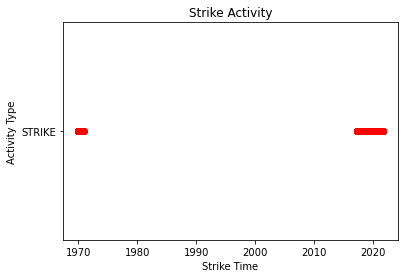

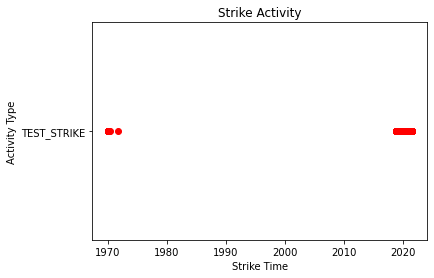

In [32]:
gn['strikeTime'].dtype
gn['strikeTime'] = pd.to_datetime(gn['strikeTime'])
gn['strikeTime'].dtype


strikes = gn[gn['activityType'] == 'STRIKE']
# strikes = strikes.dropna()
# strikes['activityType'].unique()

# Plot the data
plt.plot(strikes['strikeTime'], strikes['activityType'], 'ro')
plt.xlabel('Strike Time')
plt.ylabel('Activity Type')
plt.title('Strike Activity')
plt.show()


test_strikes = gn[gn['activityType'] == 'TEST_STRIKE']
# Plot the data
plt.plot(test_strikes['strikeTime'], test_strikes['activityType'], 'ro')
plt.xlabel('Strike Time')
plt.ylabel('Activity Type')
plt.title('Strike Activity')
plt.show()

In [33]:
gn['strikeTime']

0                               NaT
1         2017-04-04 06:10:20+00:00
2         2017-04-04 06:13:20+00:00
3         2017-04-04 06:08:20+00:00
4         2017-04-04 06:12:20+00:00
                     ...           
1094470   2021-07-28 10:30:03+00:00
1094471                         NaT
1094472                         NaT
1094473                         NaT
1094474                         NaT
Name: strikeTime, Length: 1094475, dtype: datetime64[ns, UTC]

In [34]:
print(min(gn['strikeTime']))
print(max(gn['strikeTime']))

NaT
NaT


In [35]:
from geopy.geocoders import Nominatim
from geopy import Point

geolocator = Nominatim(user_agent="my_application")

# example altitude in meters
altitude = 1000

# example latitude and longitude
latitude = -41.2777121
longitude = 174.7801745

# create a Point object with latitude, longitude, and altitude
point = Point(latitude, longitude, altitude)

# use reverse geocoding to get the name of the location
location = geolocator.reverse(point, exactly_one=True)

# print the location name
print(location.address)

Wellington Tramways Building, Featherston Street, Lambton, Pipitea, Wellington, Wellington City, Wellington, 6140, New Zealand/Aotearoa


In [147]:
best_strike_rate.shape

(44, 21)

In [163]:
def get_location(latitude, longitude):
    location = geolocator.reverse((latitude, longitude), exactly_one=True)
    if location:
        address = location.raw['address']
        city = address.get('city', '')
        town = address.get('town', '')
        district = address.get('district', '')
        if city:
            return city
        elif town:
            return town
        elif district:
            return district
    return None

In [151]:
sample_reg = best_strike_rate.head(2)

In [166]:
# sample_reg['full_address'] = sample_reg.apply(lambda row: get_address(row['latitude'], row['longitude']), axis=1)
best_strike_rate['region'] = best_strike_rate.apply(lambda row: get_location(row['latitude'], row['longitude']), axis=1)


In [168]:
sample_reg.columns
sel = ['region']
best_strike_rate[sel]

,region
0,Wellington
1,Waitara
2,None
3,None
4,Greytown Community
5,Fiordland Community
6,None
7,Northern Community
8,None
9,Auckland


AttributeError: module 'matplotlib.pyplot' has no attribute 'spines'

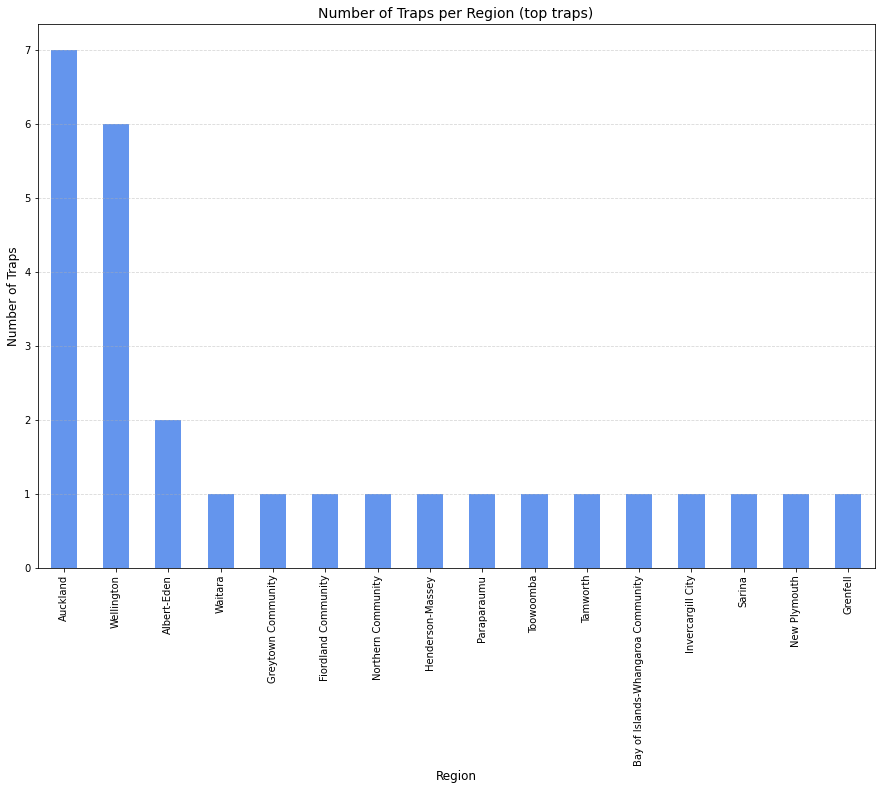

In [227]:
best_strike_rate_filtered = best_strike_rate.dropna(subset=['region'])


# Count the number of traps per region
trap_counts = best_strike_rate_filtered['region'].value_counts()

# Sort the regions by trap count in descending order
trap_counts = trap_counts.sort_values(ascending=False)

# Create a bar plot
plt.figure(figsize=(15, 10))
trap_counts.plot(kind='bar', color='#6495ED')

# Set labels and title
plt.xlabel('Region', fontsize=12)
plt.ylabel('Number of Traps', fontsize=12)
plt.title('Number of Traps per Region (top traps)', fontsize=14)

# Rotate x-axis labels
plt.xticks(rotation=90)

# Add gridlines
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Remove spines (top and right)
plt.spines['top'].set_visible(False)
plt.spines['right'].set_visible(False)

# Show plot
plt.tight_layout()
plt.show()

AttributeError: module 'matplotlib.pyplot' has no attribute 'spines'

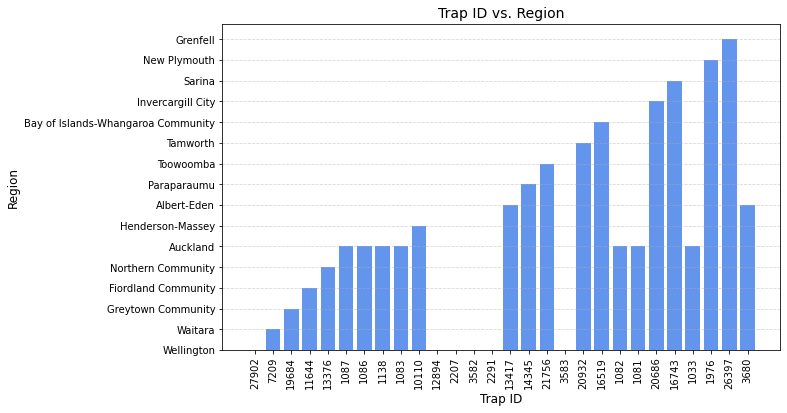

In [229]:
# Define custom colors for the bars
bar_color = '#6495ED'

best_strike_rate_filtered = best_strike_rate.dropna(subset=['region'])

# Plot trapId vs. region
plt.figure(figsize=(10, 6))
plt.bar((best_strike_rate_filtered['trapId']).astype('str'), best_strike_rate_filtered['region'], color=bar_color)

# Set labels and title
plt.xlabel('Trap ID', fontsize=12)
plt.ylabel('Region', fontsize=12)
plt.title('Trap ID vs. Region', fontsize=14)

# Rotate x-axis labels
plt.xticks(rotation=90)

# Add gridlines
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Remove spines (top and right)
plt.spines['top'].set_visible(False)
plt.spines['right'].set_visible(False)

# Show plot
plt.tight_layout()
plt.show()

In [233]:
trap_count_by_region = best_strike_rate['region'].value_counts().reset_index()
trap_count_by_region.columns = ['Region', 'Trap Count']

print(trap_count_by_region)

                                Region  Trap Count
0                             Auckland           7
1                           Wellington           6
2                          Albert-Eden           2
3                              Waitara           1
4                   Greytown Community           1
5                  Fiordland Community           1
6                   Northern Community           1
7                     Henderson-Massey           1
8                          Paraparaumu           1
9                            Toowoomba           1
10                            Tamworth           1
11  Bay of Islands-Whangaroa Community           1
12                   Invercargill City           1
13                              Sarina           1
14                        New Plymouth           1
15                            Grenfell           1


AttributeError: module 'matplotlib.pyplot' has no attribute 'spines'

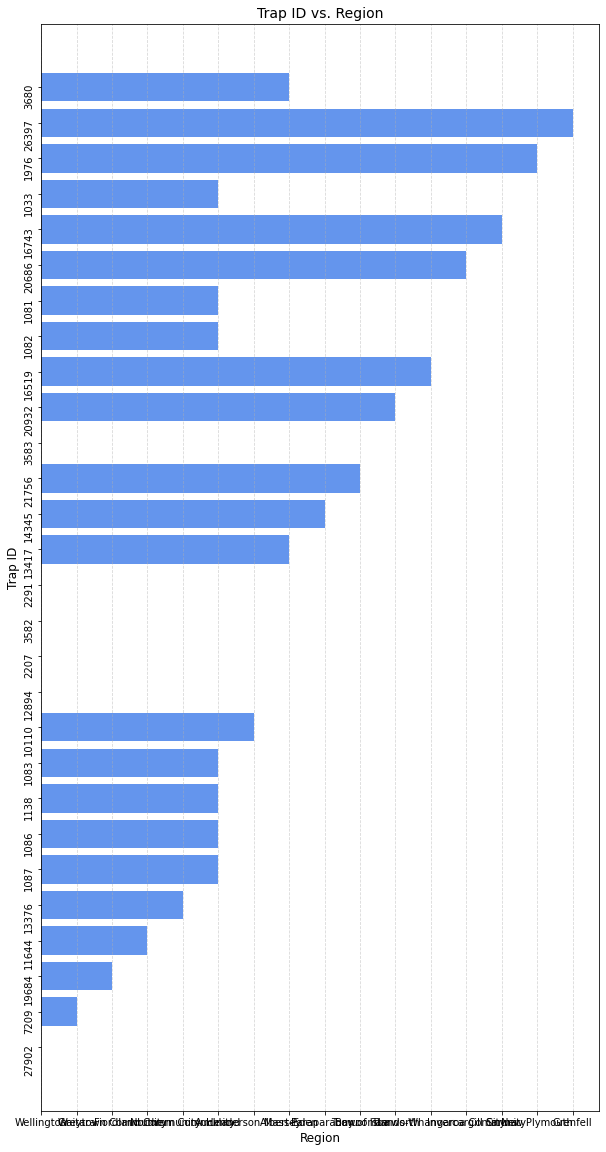

In [232]:
# Define custom colors for the bars
bar_color = '#6495ED'

best_strike_rate_filtered = best_strike_rate.dropna(subset=['region'])

# Plot trapId vs. region
plt.figure(figsize=(10,20))
plt.barh((best_strike_rate_filtered['trapId']).astype('str'), best_strike_rate_filtered['region'], color=bar_color)

# Set labels and title
plt.xlabel('Region', fontsize=12)
plt.ylabel('Trap ID', fontsize=12)
plt.title('Trap ID vs. Region', fontsize=14)

# Rotate y-axis labels
plt.yticks(rotation=90)

# Add gridlines
plt.grid(axis='x', linestyle='--', alpha=0.5)

# Remove spines (top and right)
plt.spines['top'].set_visible(False)
plt.spines['right'].set_visible(False)

# Show plot
plt.tight_layout()
plt.show()


In [ ]:
print(all_best_strikes.columns)
print(all_best_strikes.head)

In [194]:
all_best_strikes.columns

Index(['trapId', 'strikeCount', 'id', 'when', 'activityType', 'strikeTime',
       'batchId', 'createdBy', 'groupId', 'organisationId', 'killType',
       'latitude', 'longitude', 'temperature', 'batteryLevel', 'hasImage',
       'trapInstalledAt', 'trapInstalledAt_NZ', 'trapInstalledAt_hour', 'year',
       'month', 'strikeTime_NZ', 'strikeTime_hour', 'strikeTimeMonth',
       'strikeTime_month', 'strikeTime_year'],
      dtype='object')

In [239]:
import statsmodels.api as sm

# Define the independent variables (features)
features = ['strikeTime_hour', 'strikeTime_month', 'strikeTime_year']

# Add a constant term to the features
X = sm.add_constant(all_best_strikes[features])

# Define the dependent variable
y = all_best_strikes['strikeCount']

# Fit the Poisson regression model
poisson_model1 = sm.GLM(y, X, family=sm.families.Poisson()).fit()

# Print the model summary
print(poisson_model1.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:            strikeCount   No. Observations:                 7626
Model:                            GLM   Df Residuals:                     7622
Model Family:                 Poisson   Df Model:                            3
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -3.4387e+05
Date:                Mon, 29 May 2023   Deviance:                   6.3347e+05
Time:                        14:00:23   Pearson chi2:                 7.57e+05
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const              -23.9911      0.369  

C:\Users\anjan\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
import statsmodels.api as sm

# Define the independent variables (features)
features = ['strikeTime_hour', 'strikeTime_month', 'strikeTime_year', 'region']

# Add a constant term to the features
X = sm.add_constant(all_best_strikes[features])

# Define the dependent variable
y = all_best_strikes['strikeCount']

# Fit the Poisson regression model
poisson_model = sm.GLM(y, X, family=sm.families.Poisson()).fit()

# Print the model summary
print(poisson_model.summary())

In [206]:
all_best_strikes.shape

(7626, 27)

In [205]:
all_best_strikes = all_best_strikes.merge(best_strike_rate[['trapId', 'region']], on='trapId', how='left')


In [260]:
import statsmodels.api as sm

# Define the independent variables (features)
features = ['strikeTime_hour', 'strikeTime_month', 'strikeTime_year', 'latitude', 'longitude']

# Add a constant term to the features
X = sm.add_constant(all_best_strikes[features])

# Define the dependent variable
y = all_best_strikes['strikeCount']

# Fit the Poisson regression model
poisson_model2 = sm.GLM(y, X, family=sm.families.Poisson()).fit()

# Print the model summary
print(poisson_model2.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:            strikeCount   No. Observations:                 7626
Model:                            GLM   Df Residuals:                     7620
Model Family:                 Poisson   Df Model:                            5
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -2.9437e+05
Date:                Mon, 29 May 2023   Deviance:                   5.3447e+05
Time:                        14:12:22   Pearson chi2:                 6.06e+05
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const              -40.5630      0.390  

C:\Users\anjan\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [266]:
from sklearn.metrics import mean_squared_error, r2_score

def evaluate_and_plot_glm(model, X, y):
    # Add constant term to X if necessary
    if 'const' not in X.columns:
        X = sm.add_constant(X)

    # Evaluate the model
    y_pred = model.predict(X)
    residuals = y - y_pred
    rmse = rmse = np.sqrt(mean_squared_error(y, y_pred))
    r2 = r2_score(y, y_pred)

    # Plot the observed vs. predicted values
    plt.figure(figsize=(8, 6))
    plt.scatter(y, y_pred, alpha=0.5)
    plt.plot([min(y), max(y)], [min(y), max(y)], 'r--')
    plt.xlabel('Observed')
    plt.ylabel('Predicted')
    plt.title('Observed vs. Predicted')

    # Plot the residuals
    plt.figure(figsize=(8, 6))
    plt.scatter(y_pred, residuals, alpha=0.5)
    plt.axhline(y=0, color='r', linestyle='--')
    plt.xlabel('Predicted')
    plt.ylabel('Residuals')
    plt.title('Residuals vs. Predicted')

    # Print evaluation metrics
    print('Root Mean Squared Error (RMSE):', rmse)
    print('R-squared (R2):', r2)


In [267]:
evaluate_and_plot_glm(poisson_model1, all_best_strikes[features], all_best_strikes['strikeCount'])

ValueError: shapes (7626,6) and (4,) not aligned: 6 (dim 1) != 4 (dim 0)

Root Mean Squared Error (RMSE): 143.47103878832033
R-squared (R2): 0.13411640346413556


C:\Users\anjan\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


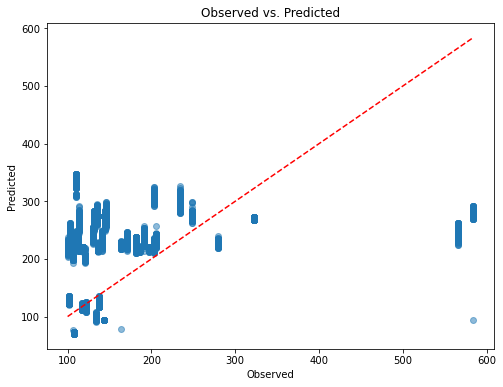

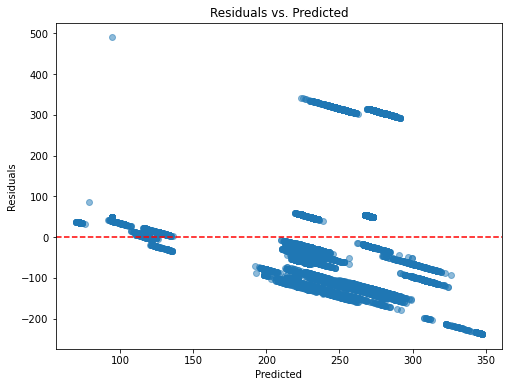

In [261]:
evaluate_and_plot_glm(poisson_model2, all_best_strikes[features], all_best_strikes['strikeCount'])

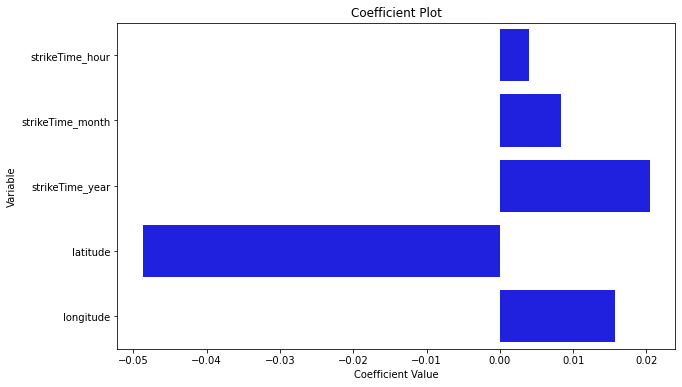

In [236]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Coefficients and their names
coefs = np.array([0.0040, 0.0084, 0.0205, -0.0487, 0.0157])
names = ['strikeTime_hour', 'strikeTime_month', 'strikeTime_year', 'latitude', 'longitude']

# Plotting the coefficient plot
plt.figure(figsize=(10, 6))
sns.barplot(x=coefs, y=names, color='blue')

# Set labels and title
plt.xlabel('Coefficient Value')
plt.ylabel('Variable')
plt.title('Coefficient Plot')

# Show plot
plt.show()

In [201]:
all_best_strikes['region'] = all_best_strikes.apply(lambda row: get_location(row['latitude'], row['longitude']), axis=1)


KeyboardInterrupt: 

In [37]:
gn1 = gn[:10]
# gn1
try:
    gn1['address'] = gn1.apply(lambda row: get_address(row['latitude'], row['longitude']), axis=1)
except GeocoderTimedOut:
    print("Geocoder timed out, try again later.")

#Print the DataFrame with addresses
print(gn1)

   id                        when activityType                strikeTime  \
0   1  2018-06-17 20:12:02.455+00       SYNCED                       NaT   
1   4  2018-06-17 20:12:02.461+00       STRIKE 2017-04-04 06:10:20+00:00   
2   7  2018-06-17 20:12:02.461+00       STRIKE 2017-04-04 06:13:20+00:00   
3   2  2018-06-17 20:12:02.461+00       STRIKE 2017-04-04 06:08:20+00:00   
4   6  2018-06-17 20:12:02.461+00       STRIKE 2017-04-04 06:12:20+00:00   
5   5  2018-06-17 20:12:02.461+00       STRIKE 2017-04-04 06:11:20+00:00   
6   3  2018-06-17 20:12:02.461+00       STRIKE 2017-04-04 06:09:20+00:00   
7   8  2018-06-17 20:12:03.092+00       SYNCED                       NaT   
8   9  2018-06-17 20:12:03.102+00       STRIKE 2018-03-11 19:23:19+00:00   
9  10  2018-06-17 20:12:03.728+00       SYNCED                       NaT   

   batchId  createdBy  trapId  groupId  organisationId killType  ...  \
0      1.0        NaN       1      NaN             NaN      NaN  ...   
1      1.0        2

C:\Users\anjan\AppData\Local\Temp/ipykernel_20080/4099549477.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gn1['address'] = gn1.apply(lambda row: get_address(row['latitude'], row['longitude']), axis=1)


In [38]:
gn = gn.dropna(subset=['latitude', 'longitude'])
gn.shape

(1069192, 22)

In [39]:
gn = gn.drop_duplicates(subset=['latitude', 'longitude'], keep='last')
gn.shape

(16258, 22)

In [40]:
gn.isnull().sum(axis=0)

id                          0
when                        0
activityType                0
strikeTime              15781
batchId                 15778
createdBy               13218
trapId                      0
groupId                 13591
organisationId          13491
killType                16062
latitude                    0
longitude                   0
temperature             15781
batteryLevel            16255
hasImage                    0
trapInstalledAt             0
trapInstalledAt_NZ          0
trapInstalledAt_hour        0
year                    15781
month                   15781
strikeTime_NZ           15781
strikeTime_hour         15781
dtype: int64

In [41]:
traps_per_year

year
2018     63825
2019    276533
2020    535735
2021    218382
Name: id, dtype: int64

In [ ]:
import folium
# Create a map centered on New Zealand
nz_map = folium.Map(location=[-41.5000, 172.8344], zoom_start=6)

# Add markers for each latitude-longitude pair
for lat, lon in zip(gn1['latitude'], gn1['longitude']):
    folium.Marker(location=[lat, lon]).add_to(nz_map)

# Display the map
nz_map